In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)
  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    print(distances)
    return most_common[0][0]

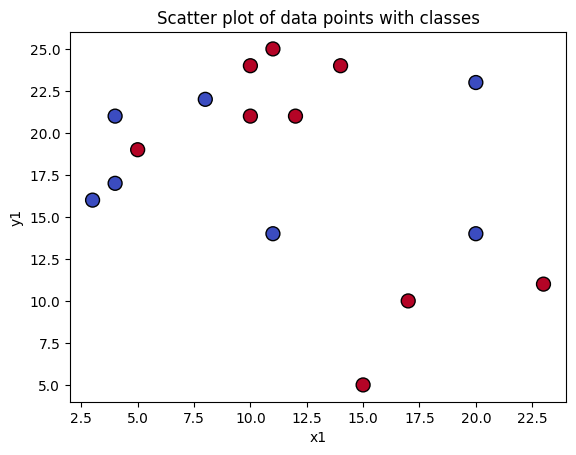

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define data points and labels
x1 = [4,5,10,4,3,11,14,8,10,12,15,20,17,23,11,20]
y1 = [21,19,24,17,16,25,24,22,21,21,5,14,10,11,14,23]
classes = [0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0]

# Combine x1 and y1 into data points and convert to numpy array
data = list(zip(x1, y1))
X, y2 = np.array(data), np.array(classes)

# Plotting the data points with colors based on classes
plt.scatter(X[:, 0], X[:, 1], c=y2, cmap='coolwarm', edgecolor='k', s=100)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Scatter plot of data points with classes')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42,shuffle=True)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[23 11]
 [20 14]
 [10 21]
 [12 21]
 [10 24]
 [20 23]
 [ 3 16]
 [ 8 22]
 [15  5]
 [17 10]
 [ 4 17]
 [14 24]]
[[ 4 21]
 [ 5 19]
 [11 25]
 [11 14]]
[1 0 1 1 1 0 0 0 1 1 0 1]
[0 1 1 0]


In [18]:
print("EUCLEDIAN DISTENCE")
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print("Prediction result:")
print(predictions)

EUCLEDIAN DISTENCE
[21.470910553583888, 17.46424919657298, 6.0, 8.0, 6.708203932499369, 16.1245154965971, 5.0990195135927845, 4.123105625617661, 19.4164878389476, 17.029386365926403, 4.0, 10.44030650891055]
[19.697715603592208, 15.811388300841896, 5.385164807134504, 7.280109889280518, 7.0710678118654755, 15.524174696260024, 3.605551275463989, 4.242640687119285, 17.204650534085253, 15.0, 2.23606797749979, 10.295630140987]
[18.439088914585774, 14.212670403551895, 4.123105625617661, 4.123105625617661, 1.4142135623730951, 9.219544457292887, 12.041594578792296, 4.242640687119285, 20.396078054371138, 16.15549442140351, 10.63014581273465, 3.1622776601683795]
[12.36931687685298, 9.0, 7.0710678118654755, 7.0710678118654755, 10.04987562112089, 12.727922061357855, 8.246211251235321, 8.54400374531753, 9.848857801796104, 7.211102550927978, 7.615773105863909, 10.44030650891055]
Prediction result:
[0 0 1 1]


In [29]:
new_x =2
new_y = 15
new_point = np.array([new_x, new_y])
predictions = clf.predict([new_point])
print("Prediction result:")
print(predictions)

[21.37755832643195, 18.027756377319946, 10.0, 11.661903789690601, 12.041594578792296, 19.697715603592208, 1.4142135623730951, 9.219544457292887, 16.401219466856727, 15.811388300841896, 2.8284271247461903, 15.0]
Prediction result:
[0]


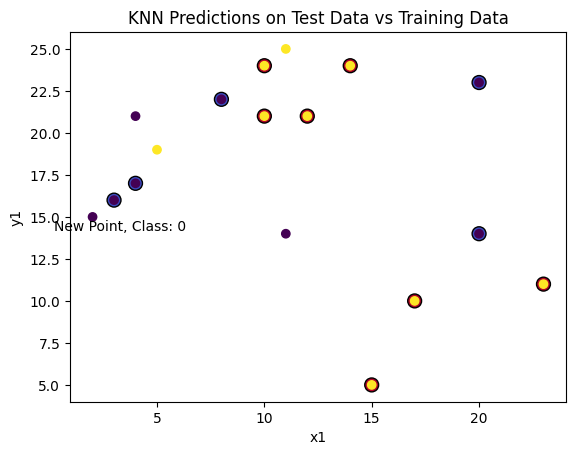

In [32]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=100, label='Training data')

# Plot test data (predictions)
plt.scatter(x1 + [new_x], y1 +[new_y], c=classes + [predictions[0]], label='Predictions')
plt.text(x=new_x-1.8,y=new_y-0.8,s=f"New Point, Class: {predictions[0]}")
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('KNN Predictions on Test Data vs Training Data')
# plt.legend()
# plt.grid(True)
plt.show()